In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob

plt.rcParams['figure.figsize'] = (14, 4)
plt.rcParams['image.cmap'] = 'inferno'

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def imread(imgpath):
    return cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB)

def imshow(img, cmap=None):
    plt.title(img.shape)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')

# Template matching with opencv

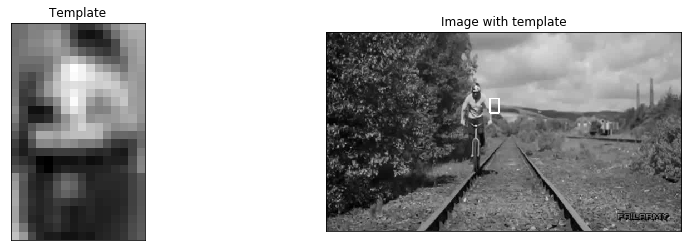

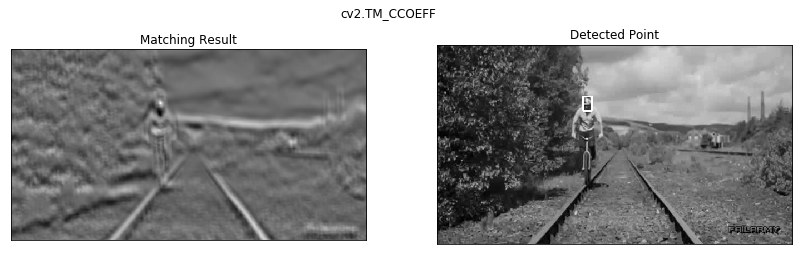

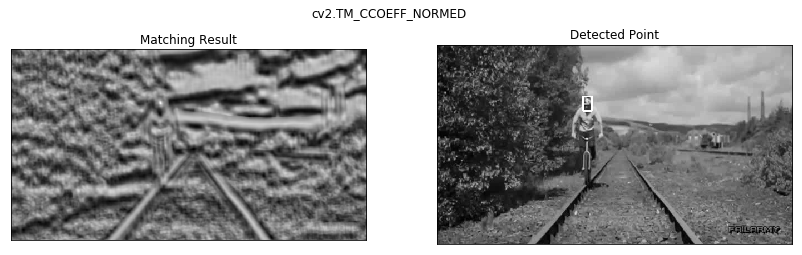

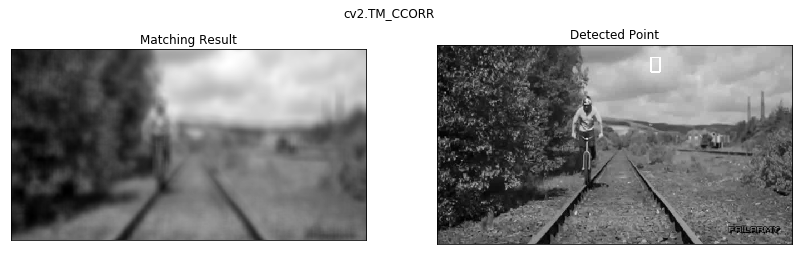

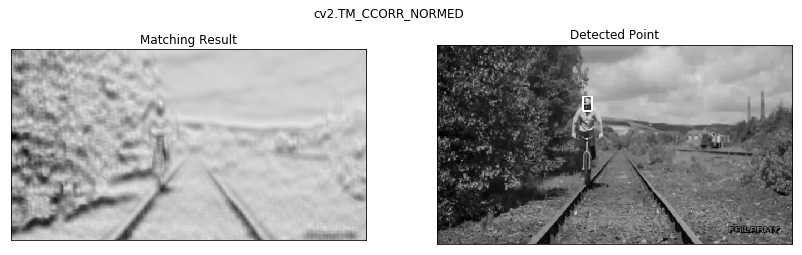

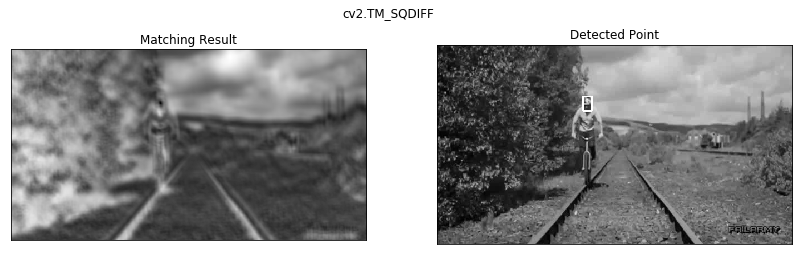

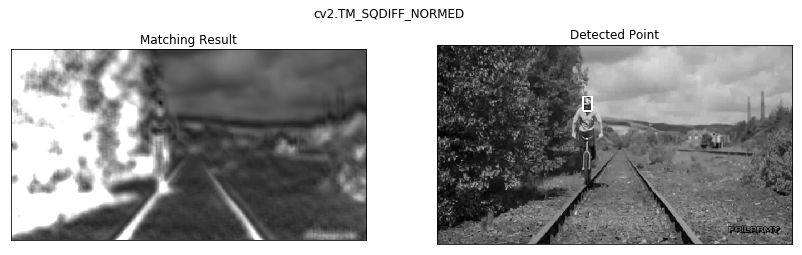

In [51]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

# input parameters
roi_range = (262, 94, 16, 26)
template_path = '../mean_shift/data/Biker/img/0001.jpg'
img_path = '../mean_shift/data/Biker/img/0001.jpg'

# read template
(x,y,w,h) = roi_range
template = cv2.imread(template_path, 0)
template = img[y:y+h, x:x+w]

# read image to find template 
img = cv2.imread(img_path, 0)
img2 = img.copy()

# print(template)
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(template, cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Image with template'), plt.xticks([]), plt.yticks([])
# plt.suptitle(meth)
plt.show()

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# methods = ['cv2.TM_SQDIFF']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# Template matching custom implementation

In [118]:
def template_matching_ssd(src, temp):
    h, w = src.shape
    ht, wt = temp.shape
   
    res = np.empty((h-ht, w-wt))
  
    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            diff = (src[dy:dy + ht, dx:dx + wt] - temp)**2
            res[dy, dx] = diff.sum()

    return res


def normalize(img):
    mean = np.mean(img)
    return (img - mean) / np.sqrt( np.sum((img - mean)**2) )
    

def template_matching_ncc(src, temp):
    h, w = src.shape
    ht, wt = temp.shape
    
    res = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")
    
    temp_norm = normalize(temp)
    
    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]
            roi_norm = normalize(roi)
            res[dy, dx] = np.sum(roi_norm * temp_norm)

    return res

def template_matching_sad(src, temp):
    h, w = src.shape
    ht, wt = temp.shape
    
    res = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")
    
    temp_norm = normalize(temp)
    
    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]
            diff = np.abs(roi - temp)
            res[dy, dx] = diff.sum()

    return res

def template_matching(img_path, template_path, template_range, method, method_name, use_max):
    # read image
    img = cv2.imread(img_path, 0)
    img2 = img.copy()
    
    # read template
    (x,y,w,h) = template_range
    template = cv2.imread(template_path, 0)
    template = img[y:y+h, x:x+w]

    res = method(img, template)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if use_max:
        top_left = max_loc
    else:
        top_left = min_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method_name)

    plt.show()
    

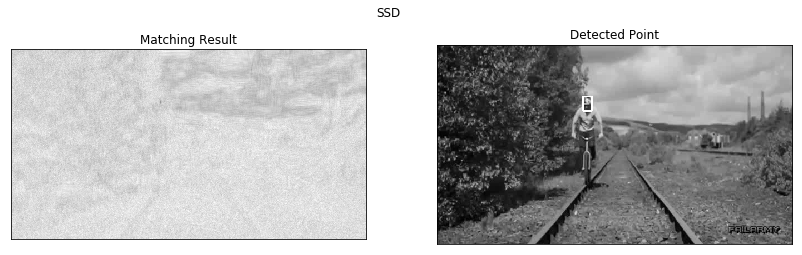

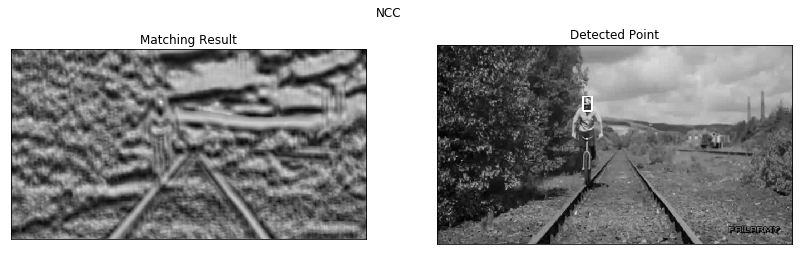

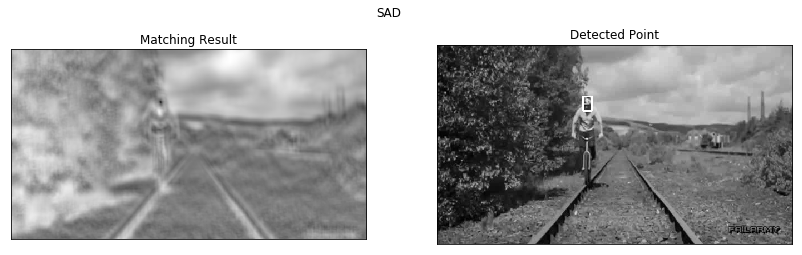

In [119]:
template_matching(img_path = '../mean_shift/data/Biker/img/0001.jpg', 
                 template_path = '../mean_shift/data/Biker/img/0001.jpg',
                 template_range = (262, 94, 16, 26),
                 method = template_matching_ssd,
                 method_name = 'SSD',
                 use_max=False)

template_matching(img_path = '../mean_shift/data/Biker/img/0001.jpg', 
                 template_path = '../mean_shift/data/Biker/img/0001.jpg',
                 template_range = (262, 94, 16, 26),
                 method = template_matching_ncc,
                 method_name = 'NCC',
                 use_max=True)

template_matching(img_path = '../mean_shift/data/Biker/img/0001.jpg', 
                 template_path = '../mean_shift/data/Biker/img/0001.jpg',
                 template_range = (262, 94, 16, 26),
                 method = template_matching_sad,
                 method_name = 'SAD',
                 use_max=False)